In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [2]:
dataset=pd.read_csv('https://raw.githubusercontent.com/s4sauravv/Datasets/main/Mall_Customers.csv')
X =dataset[['Annual Income (k$)','Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [3]:
X = StandardScaler().fit_transform(X)
X[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

In [4]:
db = DBSCAN(eps=0.4, min_samples=4).fit(X)

In [5]:
labels = db.labels_
print (labels)

[ 0  0  0  0  0  0  0 -1  0  0  0 -1  0  0  0  0  0  0  0 -1  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  1  0  1  0  1  2  1  2  1  0  1  2  1  2  1  2  1  2  1  0  1
  2  1  0  1  2  1  2  1  2  1  2  1  2  1  2  1  0  1  2  1  2  1  2  1
  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1 -1  1  2 -1  2  1  2 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


In [6]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) # the label -1 is considered as noise by the DBSCAN algorithm
n_noise_ = list(labels).count(-1)

In [7]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 14


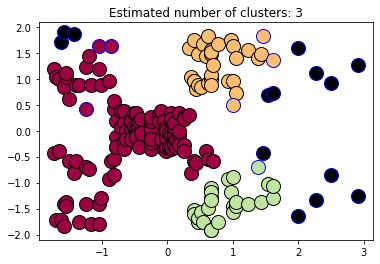

In [8]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
import matplotlib.pyplot as plt
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='b', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [9]:
np.unique(labels, return_counts=True)

(array([-1,  0,  1,  2], dtype=int64),
 array([ 14, 126,  33,  27], dtype=int64))

In [10]:
noises = X[labels == -1]
print (noises)

[[-1.62449091  1.70038436]
 [-1.58632148  1.89449216]
 [-1.43364376  1.8556706 ]
 [ 1.46723286 -0.43480148]
 [ 1.54357172  0.69102378]
 [ 1.61991057  0.72984534]
 [ 2.00160487 -1.63826986]
 [ 2.00160487  1.58391968]
 [ 2.26879087 -1.32769738]
 [ 2.26879087  1.11806095]
 [ 2.49780745 -0.86183865]
 [ 2.49780745  0.92395314]
 [ 2.91767117 -1.25005425]
 [ 2.91767117  1.27334719]]
